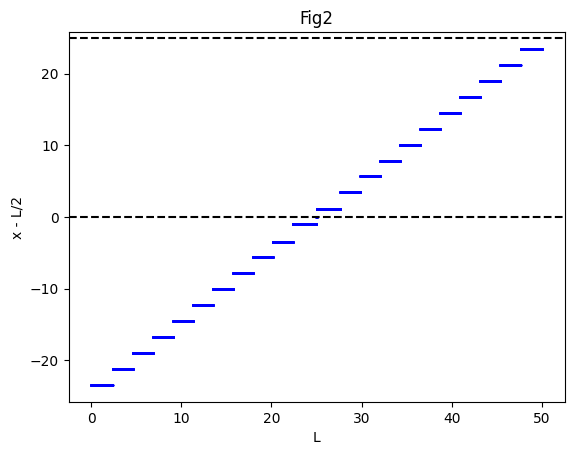

In [12]:
import numpy as np
import matplotlib.pyplot as plt

L = 50 # 数轴上的区间长度
num_agents = 500 * L # agent的数量


opinions = np.linspace(0, L, num_agents, endpoint=True) # 智能体的初始opinions
convergence_threshold = 1e-3  # 收敛阈值
max_iterations = 10000 # 最大迭代次数
threshold = 1 # opinions更新的阈值


# 存储每个智能体每次迭代的意见
opinions_history = []

# 先定义一个函数，找出距离小于1的智能体
def find_neighbours(agent, opinions):
    return np.abs(opinions - agent) < 1

# 再定义一个函数, 更新智能体的opinions
def update_opinions(opinions, threshold):
    new_opinions = np.copy(opinions) # 复制一份opinions
    for i in range(len(opinions)): # 遍历每一个智能体
        neighbours = find_neighbours(opinions[i], opinions) # 调用find_neighbours找出距离小于1的智能体
        # 选出与当前智能体距离小于1的智能体的opinions差值在阈值内的智能体
        mark = np.abs(opinions - opinions[i]) < threshold 
        # 更新opinions
        new_opinions[i] = np.mean(opinions[mark]) # 更新opinions
    return new_opinions # 返回更新后的opinions    



# 运行仿真
for _ in range(max_iterations):
    new_opinions = update_opinions(opinions, threshold)  # 更新opinions
    if np.all(np.abs(new_opinions - opinions) < convergence_threshold):  # 如果opinions收敛
        break  # 跳出循环
    opinions = new_opinions  # 更新opinions
    opinions_history.append(opinions.copy())  # 记录当前时间步的意见值

# 画图
plt.figure()

# 横坐标为L
x = np.linspace(0, L, num_agents)
# 纵坐标为opinions-L/2
y = opinions - L/2

plt.plot(x, y, 'b.', markersize=1)
plt.axhline(y=0, color='k', linestyle='dashed')
plt.axhline(y=L/2, color='k', linestyle='dashed')
plt.xlabel('L')
plt.ylabel('x - L/2')
plt.title('Fig2')
plt.show()






